
# Project: Investigate a Dataset : TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis : Q1</a></li>
<li><a href="#eda2">Exploratory Data Analysis : Q2</a></li>
<li><a href="#eda3">Exploratory Data Analysis : Q3</a></li>
<li><a href="#eda4">Exploratory Data Analysis : Q4</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Associations and Effects for directors are evaluated in this analysis
> Some questions to be answered are:
- Over the decades, who are the popular directors?
- Is revenue related to directorial creativity? 
- Are runtimes and directors related? i.e. do directors have preference of movie durations?

> The investigations conducted here are exploratory and any associations will be tentative at best, as only visualization and basic correlations are attempted in this project. Any relation inferred will be used only as a pointer for conducting further detailed, statistically backed analyses. 


> Codes are based on Udacity DAND lessons, my own code from solving the assignments and exercises, including previous DAND projects as well as links [like StackOverflow] from the resources mentioned in DAND syllabus.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import statements for packages to be used
import pandas as pd
import csv # read and write csv files
from datetime import datetime # operations to parse dates
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
**Observations**
- Rows: 10866 
- Columns: 21
- Null values  present in variables: [as inspected in code below]
> - imdb_id 
> - cast
> - homepage
> - director
> - tagline
> - keywords
> - overview
> - genres
> - production_companies

**Cleaning Steps Taken:**
- Data is relatively clean. 
- One duplicate record is present and is deleted.
- Of the different variables, imdb_id is significant to identify the records uniquely. Only 10 of 10865 are missing. Hence, we only drop the records with this value as missing. 
- In this analysis, we are inspecting directors and any relation to other given variables. So, we also drop rows with missing values for this column.
- Other values with missing values are not significant, hence, retained 'as-is'.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
# check number of duplicate records
sum(df.duplicated())

1

In [4]:
# drop rows that are duplicates and save in dataset itself 
df.drop_duplicates(inplace=True)

In [5]:
#inspect dataset to confirm 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [6]:
# check columns with null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Dropping rows)

In [7]:
# After viewing the structure of the TMDb dataset and deleting duplicate records
#   we perform cleaning steps in this second part.
# Here, we are removing rows with null values in imdb_id column and directors only
df.dropna(subset=['imdb_id'], inplace=True) 
df.dropna(subset=['director'], inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10815 entries, 0 to 10865
Data columns (total 21 columns):
id                      10815 non-null int64
imdb_id                 10815 non-null object
popularity              10815 non-null float64
budget                  10815 non-null int64
revenue                 10815 non-null int64
original_title          10815 non-null object
cast                    10745 non-null object
homepage                2925 non-null object
director                10815 non-null object
tagline                 8029 non-null object
keywords                9353 non-null object
overview                10812 non-null object
runtime                 10815 non-null int64
genres                  10795 non-null object
production_companies    9812 non-null object
release_date            10815 non-null object
vote_count              10815 non-null int64
vote_average            10815 non-null float64
release_year            10815 non-null int64
budget_adj              1

In [8]:
#check dataset 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [9]:
#check unique values of directors
df['director'].value_counts()

Woody Allen                                      45
Clint Eastwood                                   34
Steven Spielberg                                 29
Martin Scorsese                                  29
Ridley Scott                                     23
Steven Soderbergh                                22
Ron Howard                                       22
Joel Schumacher                                  21
Brian De Palma                                   20
Barry Levinson                                   19
Tim Burton                                       19
Wes Craven                                       19
John Carpenter                                   18
Rob Reiner                                       18
David Cronenberg                                 18
Mike Nichols                                     18
Sidney Lumet                                     17
Peter Hyams                                      17
Robert Zemeckis                                  17
Norman Jewis

There are very few [relatively] records with multiple directors. Hence, we leave these records as it is. Assumption is that personal preferences and styles might change in collaborative ventures.

In [10]:
# save new clean dataset for next section
df.to_csv('data_imdb_dir.csv', index=False)

<a id='eda1'></a>
## Exploratory Data Analysis

### Research Question 1 
##### Over the years, who are the popular directors?

In [2]:
# Importing data from newly cleaned dataset
df_dir = pd.read_csv('data_imdb_dir.csv')
df_dir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10815 entries, 0 to 10814
Data columns (total 21 columns):
id                      10815 non-null int64
imdb_id                 10815 non-null object
popularity              10815 non-null float64
budget                  10815 non-null int64
revenue                 10815 non-null int64
original_title          10815 non-null object
cast                    10745 non-null object
homepage                2925 non-null object
director                10815 non-null object
tagline                 8029 non-null object
keywords                9353 non-null object
overview                10812 non-null object
runtime                 10815 non-null int64
genres                  10795 non-null object
production_companies    9812 non-null object
release_date            10815 non-null object
vote_count              10815 non-null int64
vote_average            10815 non-null float64
release_year            10815 non-null int64
budget_adj              1

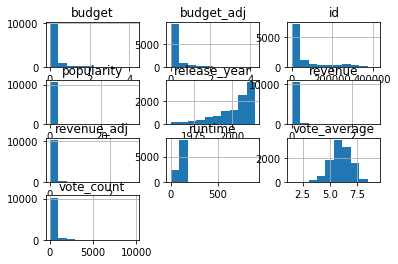

In [3]:
#Create basic histograms
df_dir.hist();

In [4]:
pop_dir = df_dir['director'].value_counts()
pop_dir[:5]

Woody Allen         45
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
Name: director, dtype: int64

This shows us the directors with maximum releases over the years but is not indicative of popularity. Hence, we try grouping by director names to gauge the popularity better.

In [5]:
director_df = df_dir.groupby('director') #save dataframe grouped by directors separately
dir_mean_df = director_df.mean()
dir_mean_df

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
FrÌÄå©dÌÄå©ric Jardin,79070.000000,0.434506,2.500000e+06,3.358000e+03,98.000000,28.000000,5.900000,2011.000000,2.423495e+06,3.255239e+03
A. Todd Smith,370687.000000,1.876037,0.000000e+00,0.000000e+00,0.000000,11.000000,5.400000,2015.000000,0.000000e+00,0.000000e+00
A.R. Murugadoss,14070.000000,0.215030,9.100000e+06,7.600000e+07,183.000000,53.000000,6.900000,2008.000000,9.216358e+06,7.697178e+07
Aaron Aites,36124.000000,0.108700,0.000000e+00,0.000000e+00,93.000000,13.000000,6.500000,2008.000000,0.000000e+00,0.000000e+00
Aaron Blaise|Robert Walker,10009.000000,1.653031,1.000000e+08,2.500000e+02,85.000000,753.000000,6.800000,2003.000000,1.185353e+08,2.963382e+02
Aaron Hann|Mario Miscione,335866.000000,0.350599,0.000000e+00,0.000000e+00,87.000000,167.000000,6.100000,2015.000000,0.000000e+00,0.000000e+00
Aaron Harvey,75736.000000,1.212003,7.000000e+06,0.000000e+00,93.000000,71.000000,4.900000,2011.000000,6.785786e+06,0.000000e+00
Aaron Katz|Martha Stephens,252102.000000,0.267446,0.000000e+00,0.000000e+00,96.000000,17.000000,5.800000,2014.000000,0.000000e+00,0.000000e+00
Aaron Keeling|Austin Keeling,326247.000000,0.078363,0.000000e+00,0.000000e+00,111.000000,10.000000,3.800000,2015.000000,0.000000e+00,0.000000e+00


In [6]:
director_df.median()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
FrÌÄå©dÌÄå©ric Jardin,79070.0,0.434506,2500000.0,3358.0,98.0,28.0,5.90,2011.0,2.423495e+06,3.255239e+03
A. Todd Smith,370687.0,1.876037,0.0,0.0,0.0,11.0,5.40,2015.0,0.000000e+00,0.000000e+00
A.R. Murugadoss,14070.0,0.215030,9100000.0,76000000.0,183.0,53.0,6.90,2008.0,9.216358e+06,7.697178e+07
Aaron Aites,36124.0,0.108700,0.0,0.0,93.0,13.0,6.50,2008.0,0.000000e+00,0.000000e+00
Aaron Blaise|Robert Walker,10009.0,1.653031,100000000.0,250.0,85.0,753.0,6.80,2003.0,1.185353e+08,2.963382e+02
Aaron Hann|Mario Miscione,335866.0,0.350599,0.0,0.0,87.0,167.0,6.10,2015.0,0.000000e+00,0.000000e+00
Aaron Harvey,75736.0,1.212003,7000000.0,0.0,93.0,71.0,4.90,2011.0,6.785786e+06,0.000000e+00
Aaron Katz|Martha Stephens,252102.0,0.267446,0.0,0.0,96.0,17.0,5.80,2014.0,0.000000e+00,0.000000e+00
Aaron Keeling|Austin Keeling,326247.0,0.078363,0.0,0.0,111.0,10.0,3.80,2015.0,0.000000e+00,0.000000e+00


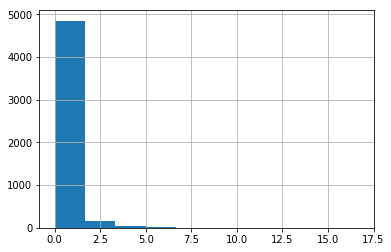

In [16]:
dir_mean_df['popularity'].hist();

In [40]:
dir_mean_df['popularity'].describe()

count    5064.000000
mean        0.511897
std         0.694520
min         0.000973
25%         0.190121
50%         0.339477
75%         0.579055
max        16.696886
Name: popularity, dtype: float64

In [36]:
# directors with maximum popularity ratings
dir_mean_df['popularity'].nlargest(10) 

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

In [35]:
dir_mean_df[880:900]#double check values

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,
Clive A. Smith,21356.00,0.195539,8000000.0,0.000000e+00,77.000000,14.000000,6.100000,1983.000000,1.751450e+07,0.000000e+00
Clive Barker,12819.00,0.321329,4000000.0,7.808794e+06,105.000000,86.666667,6.200000,1990.666667,6.758988e+06,1.424664e+07
Clive Donner,23138.25,0.250399,0.0,0.000000e+00,101.250000,19.500000,5.925000,1977.750000,0.000000e+00,0.000000e+00
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,12230.00,2.631987,4000000.0,2.158800e+08,79.000000,913.000000,6.600000,1961.000000,2.917944e+07,1.574815e+09
ClÌÄå©ment Virgo,14174.00,1.203532,2200000.0,0.000000e+00,93.000000,36.000000,5.000000,2005.000000,2.456439e+06,0.000000e+00
Cody Calahan,207780.00,0.258887,0.0,0.000000e+00,90.000000,19.000000,4.300000,2013.000000,0.000000e+00,0.000000e+00
Cody Cameron,51170.00,0.484243,0.0,0.000000e+00,75.000000,64.000000,5.300000,2010.000000,0.000000e+00,0.000000e+00
Cody Cameron|Kris Pearn,109451.00,0.932599,78000000.0,2.483846e+08,95.000000,637.000000,6.400000,2013.000000,7.301060e+07,2.324963e+08
Coky Giedroyc,148110.50,0.131463,0.0,0.000000e+00,159.000000,18.500000,6.600000,2008.000000,0.000000e+00,0.000000e+00


### Observations on Popularity:
- We have here the list of ten most popular directors.
- We also see that most directors score between 0 and 1 as per popularity. 
- The distribution is very skewed to the right.

<a id='eda2'></a>

## Exploratory Data Analysis

### Research Question 2
#### What are typical runtimes for directors? Is there a duration preferred by directors?
Steps:
- To answer this question, we view the runtime variable from our dataset grouped over the director factor.

In [41]:
dir_mean_df['runtime'].describe()

count    5064.000000
mean       97.942123
std        33.439046
min         0.000000
25%        89.000000
50%        96.000000
75%       106.000000
max       900.000000
Name: runtime, dtype: float64

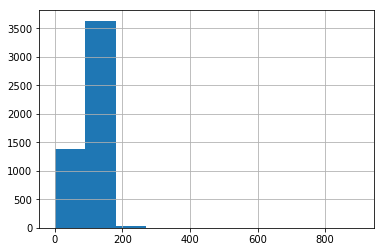

In [42]:
dir_mean_df['runtime'].hist();

#### Observations- Runtime:
- The popular runtime across directors is 100-180 as seen in the visualization. 
- This is also verified by our quartile percentages. 
- The distribution is skewed to the right.

<a id='eda3'></a>

## Exploratory Data Analysis

### Research Question 2
#### What are typical revenues for directors? Who are the most successful directors?
Steps:
- To answer this question, we view the revenue variable from our dataset grouped over the director factor.

In [43]:
dir_mean_df['revenue'].describe()

count    5.064000e+03
mean     2.297306e+07
std      7.654512e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.658396e+06
max      1.156731e+09
Name: revenue, dtype: float64

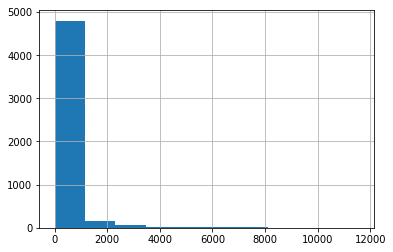

In [53]:
rev = dir_mean_df['revenue']
rev_new = rev / 100000
rev_new.hist();

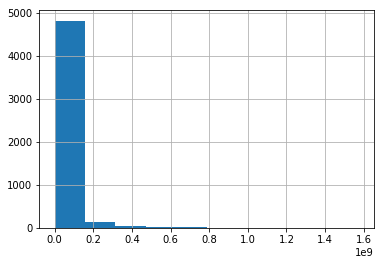

In [51]:
dir_mean_df['revenue_adj'].hist();

In [45]:
# directors with maximum revenues
dir_mean_df['revenue'].nlargest(10) 

director
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
Andrew Stanton|Lee Unkrich                   8.646260e+08
Pete Docter                                  8.537086e+08
David Yates                                  8.308591e+08
Chris Miller|Raman Hui                       7.989582e+08
Roger Allers|Rob Minkoff                     7.882418e+08
Colin Trevorrow                              7.587683e+08
Robert Stromberg                             7.584104e+08
Name: revenue, dtype: float64

In [47]:
# directors with maximum revenue_adj
dir_mean_df['revenue_adj'].nlargest(10) 

director
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.574815e+09
Roger Allers|Rob Minkoff                             1.159592e+09
Kyle Balda|Pierre Coffin                             1.064192e+09
Lee Unkrich                                          1.063172e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon            1.061904e+09
George Lucas                                         1.052320e+09
Andrew Stanton|Lee Unkrich                           1.024887e+09
Chris Miller|Raman Hui                               8.402392e+08
David Yates                                          8.354911e+08
Pete Docter                                          7.854116e+08
Name: revenue_adj, dtype: float64

#### Observations- Revenue:
- The popular revenue across directors is 0.1e6 to 1000e6 as seen in the visualization. 
- This is also verified by our quartile percentages. 
- The distribution is skewed to the right.

<a id='eda4'></a>

## Exploratory Data Analysis

### Research Question 2
#### Is there a relation between popularity and revenue for directors?
Steps:
- To answer this question, we visualize the revenue and popularity variable from our dataset grouped over the director factor.

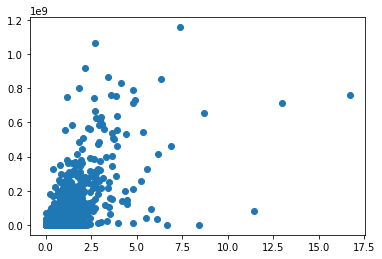

In [56]:
plt.scatter(x=dir_mean_df['popularity'], y=dir_mean_df['revenue']);

In [55]:
dir_mean_df.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.044878,-0.154395,-0.104452,-0.061491,-0.051312,-0.022830,0.538960,-0.193834,-0.140135
popularity,-0.044878,1.000000,0.579946,0.679109,0.052462,0.811656,0.157441,0.062540,0.545452,0.630990
budget,-0.154395,0.579946,1.000000,0.774930,0.096742,0.690545,0.096692,0.035670,0.966103,0.704794
revenue,-0.104452,0.679109,0.774930,1.000000,0.064979,0.830514,0.153495,0.023623,0.739031,0.936411
runtime,-0.061491,0.052462,0.096742,0.064979,1.000000,0.071334,0.100968,-0.110586,0.125416,0.083880
vote_count,-0.051312,0.811656,0.690545,0.830514,0.071334,1.000000,0.211894,0.082199,0.642083,0.761461
vote_average,-0.022830,0.157441,0.096692,0.153495,0.100968,0.211894,1.000000,-0.057802,0.096641,0.156751
release_year,0.538960,0.062540,0.035670,0.023623,-0.110586,0.082199,-0.057802,1.000000,-0.062890,-0.083238
budget_adj,-0.193834,0.545452,0.966103,0.739031,0.125416,0.642083,0.096641,-0.062890,1.000000,0.718762
revenue_adj,-0.140135,0.630990,0.704794,0.936411,0.083880,0.761461,0.156751,-0.083238,0.718762,1.000000


Observations:
- We see fromm our scatterplot and correlation that popularity and revenue for directors is positively correlated, but not  very significantly.
- But we do notice that for at lower values, the relation is significant.
- However, this is purely correlation and not to be inferred as causal.
- It does pointv us to a line of investigation that we can take up for detailed assessment.

<a id='conclusions'></a>
## Conclusions

- From our EDA, we discovered that there are *patterns to runtimes, popularity and revenues of directors*. 
- While only tentative, we found that popular runtimes range between 100 and 180 minutes.
- Also, ratings for directors had maximum likelihood of being in the 0 to 1 range.
- Revenues showed a wider range, but the most likely range was 0.1e6 to 1000e6.
- We also analyzed who the most successful directors were popularity-wise and revenue-wise.
- However, these analysis do not account for collaborations.
- These lines of analysis point us to the need for further investigation, especially with regards to revenue and popularity.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0